In [1364]:
import time

import chess

SORT_KING = 400000000

# index for white and black side
WHITE = chess.WHITE
BLACK = chess.BLACK
KING_WHITE = 'K'
KING_BLACK = 'k'
QUEEN_WHITE = 'Q'
QUEEN_BLACK = 'q'
ROOK_WHITE = 'R'
ROOK_BLACK = 'r'
BISHOP_WHITE = 'B'
BISHOP_BLACK = 'b'
KNIGHT_WHITE = 'N'
KNIGHT_BLACK = 'n'
PAWN_WHITE = 'P'
PAWN_BLACK = 'p'
STEP_FORWARD = [-8, 8]
STEP_BACKWARD = [8, -8]

pawn_white = chess.Piece(chess.PAWN, chess.WHITE)
pawn_black = chess.Piece(chess.PAWN, chess.BLACK)
bishop_white = chess.Piece(chess.BISHOP, WHITE)
bishop_black = chess.Piece(chess.BISHOP, BLACK)
knight_white = chess.Piece(chess.KNIGHT, WHITE)
knight_black = chess.Piece(chess.KNIGHT, BLACK)
rook_white = chess.Piece(chess.ROOK, WHITE)
rook_black = chess.Piece(chess.ROOK, BLACK)
queen_white = chess.Piece(chess.QUEEN, WHITE)
queen_black = chess.Piece(chess.QUEEN, BLACK)
king_white = chess.Piece(chess.KING, WHITE)
king_black = chess.Piece(chess.KING, BLACK)

index = {
     WHITE: [
          56,  57,  58,  59,  60,  61,  62,  63,
          48,  49,  50,  51,  52,  53,  54,  55,
          40,  41,  42,  43,  44,  45,  46,  47,
          32,  33,  34,  35,  36,  37,  38,  39,
          24,  25,  26,  27,  28,  29,  30,  31,
          16,  17,  18,  19,  20,  21,  22,  23,
           8,   9,  10,  11,  12,  13,  14,  15,
           0,   1,   2,   3,   4,   5,   6,   7
     ],
     BLACK: [
           0,   1,   2,   3,   4,   5,   6,   7,
           8,   9,  10,  11,  12,  13,  14,  15,
          16,  17,  18,  19,  20,  21,  22,  23,
          24,  25,  26,  27,  28,  29,  30,  31,
          32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,
          48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63
     ]
}
index_white = [
     56,  57,  58,  59,  60,  61,  62,  63,
     48,  49,  50,  51,  52,  53,  54,  55,
     40,  41,  42,  43,  44,  45,  46,  47,
     32,  33,  34,  35,  36,  37,  38,  39,
     24,  25,  26,  27,  28,  29,  30,  31,
     16,  17,  18,  19,  20,  21,  22,  23,
      8,   9,  10,  11,  12,  13,  14,  15,
      0,   1,   2,   3,   4,   5,   6,   7
]
index_black = [
      0,   1,   2,   3,   4,   5,   6,   7,
      8,   9,  10,  11,  12,  13,  14,  15,
     16,  17,  18,  19,  20,  21,  22,  23,
     24,  25,  26,  27,  28,  29,  30,  31,
     32,  33,  34,  35,  36,  37,  38,  39,
     40,  41,  42,  43,  44,  45,  46,  47,
     48,  49,  50,  51,  52,  53,  54,  55,
     56,  57,  58,  59,  60,  61,  62,  63
]


# pawn piece square tables
pawn_pcsq_mg = [
     0,   0,   0,   0,   0,   0,   0,   0,
    -6,  -4,   1,   1,   1,   1,  -4,  -6,
    -6,  -4,   1,   2,   2,   1,  -4,  -6,
    -6,  -4,   2,   8,   8,   2,  -4,  -6,
    -6,  -4,   5,  10,  10,   5,  -4,  -6,
    -4,  -4,   1,   5,   5,   1,  -4,  -4,
    -6,  -4,   1, -24,  -24,  1,  -4,  -6,
     0,   0,   0,   0,   0,   0,   0,   0
]

pawn_pcsq_eg = [
     0,   0,   0,   0,   0,   0,   0,   0,
    -6,  -4,   1,   1,   1,   1,  -4,  -6,
    -6,  -4,   1,   2,   2,   1,  -4,  -6,
    -6,  -4,   2,   8,   8,   2,  -4,  -6,
    -6,  -4,   5,  10,  10,   5,  -4,  -6,
    -4,  -4,   1,   5,   5,   1,  -4,  -4,
    -6,  -4,   1, -24,  -24,  1,  -4,  -6,
     0,   0,   0,   0,   0,   0,   0,   0
]

weak_pawn_pcsq = [
     0,   0,   0,   0,   0,   0,   0,   0,
   -10, -12, -14, -16, -16, -14, -12, -10,
   -10, -12, -14, -16, -16, -14, -12, -10,
   -10, -12, -14, -16, -16, -14, -12, -10,
   -10, -12, -14, -16, -16, -14, -12, -10,
   -10, -12, -14, -16, -16, -14, -12, -10,
   -10, -12, -14, -16, -16, -14, -12, -10,
     0,   0,   0,   0,   0,   0,   0,   0
]

passed_pawn_pcsq = [
     0,   0,   0,   0,   0,   0,   0,   0,
   140, 140, 140, 140, 140, 140, 140, 140,
    92,  92,  92,  92,  92,  92,  92,  92,
    56,  56,  56,  56,  56,  56,  56,  56,
    32,  32,  32,  32,  32,  32,  32,  32,
    20,  20,  20,  20,  20,  20,  20,  20,
    20,  20,  20,  20,  20,  20,  20,  20,
     0,   0,   0,   0,   0,   0,   0,   0
]

# knight piece square tables
knight_pcsq_mg = [
    -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
    -8,   0,   0,   0,   0,   0,   0,  -8,
    -8,   0,   4,   6,   6,   4,   0,  -8,
    -8,   0,   6,   8,   8,   6,   0,  -8,
    -8,   0,   6,   8,   8,   6,   0,  -8,
    -8,   0,   4,   6,   6,   4,   0,  -8,
    -8,   0,   1,   2,   2,   1,   0,  -8,
   -16, -12,  -8,  -8,  -8,  -8, -12,  -16
]

knight_pcsq_eg = [
    -8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
    -8,   0,   0,   0,   0,   0,   0,  -8,
    -8,   0,   4,   6,   6,   4,   0,  -8,
    -8,   0,   6,   8,   8,   6,   0,  -8,
    -8,   0,   6,   8,   8,   6,   0,  -8,
    -8,   0,   4,   6,   6,   4,   0,  -8,
    -8,   0,   1,   2,   2,   1,   0,  -8,
   -16, -12,  -8,  -8,  -8,  -8, -12,  -16
]

# bishop piece square tables
bishop_pcsq_mg = [
    -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
    -4,   0,   0,   0,   0,   0,   0,  -4,
    -4,   0,   2,   4,   4,   2,   0,  -4,
    -4,   0,   4,   6,   6,   4,   0,  -4,
    -4,   0,   4,   6,   6,   4,   0,  -4,
    -4,   1,   2,   4,   4,   2,   1,  -4,
    -4,   2,   1,   1,   1,   1,   2,  -4,
    -4,  -4, -12,  -4,  -4, -12,  -4,  -4
]

bishop_pcsq_eg = [
    -4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
    -4,   0,   0,   0,   0,   0,   0,  -4,
    -4,   0,   2,   4,   4,   2,   0,  -4,
    -4,   0,   4,   6,   6,   4,   0,  -4,
    -4,   0,   4,   6,   6,   4,   0,  -4,
    -4,   1,   2,   4,   4,   2,   1,  -4,
    -4,   2,   1,   1,   1,   1,   2,  -4,
    -4,  -4, -12,  -4,  -4, -12,  -4,  -4
]

# rook piece square tables
rook_pcsq_mg = [
     5,   5,   5,   5,   5,   5,   5,   5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
     0,   0,   0,   2,   2,   0,   0,   0
]

rook_pcsq_eg = [
     5,   5,   5,   5,   5,   5,   5,   5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
    -5,   0,   0,   0,   0,   0,   0,  -5,
     0,   0,   0,   2,   2,   0,   0,   0
]

# queen piece square tables
queen_pcsq_mg = [
     0,   0,   0,   0,   0,   0,   0,   0,
     0,   0,   1,   1,   1,   1,   0,   0,
     0,   0,   1,   2,   2,   1,   0,   0,
     0,   0,   2,   3,   3,   2,   0,   0,
     0,   0,   2,   3,   3,   2,   0,   0,
     0,   0,   1,   2,   2,   1,   0,   0,
     0,   0,   1,   1,   1,   1,   0,   0,
    -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5
]

queen_pcsq_eg = [
     0,   0,   0,   0,   0,   0,   0,   0,
     0,   0,   1,   1,   1,   1,   0,   0,
     0,   0,   1,   2,   2,   1,   0,   0,
     0,   0,   2,   3,   3,   2,   0,   0,
     0,   0,   2,   3,   3,   2,   0,   0,
     0,   0,   1,   2,   2,   1,   0,   0,
     0,   0,   1,   1,   1,   1,   0,   0,
    -5,  -5,  -5,  -5,  -5,  -5,  -5,  -5
]

# king piece square tables
king_pcsq_mg = [
   -40, -30, -50, -70, -70, -50, -30, -40,
   -30, -20, -40, -60, -60, -40, -20, -30,
   -20, -10, -30, -50, -50, -30, -10, -20,
   -10,   0, -20, -40, -40, -20,   0, -10,
     0,  10, -10, -30, -30, -10,  10,   0,
    10,  20,   0, -20, -20,   0,  20,  10,
    30,  40,  20,   0,   0,  20,  40,  30,
    40,  50,  30,  10,  10,  30,  50,  40
]

king_pcsq_eg = [
   -72, -48, -36, -24, -24, -36, -48, -72,
   -48, -24, -12,   0,   0, -12, -24, -48,
   -36, -12,   0,  12,  12,   0, -12, -36,
   -24,   0,  12,  24,  24,  12,   0, -24,
   -24,   0,  12,  24,  24,  12,   0, -24,
   -36, -12,   0,  12,  12,   0, -12, -36,
   -48, -24, -12,   0,   0, -12, -24, -48,
   -72, -48, -36, -24, -24, -36, -48, -72
]

constants = {
  'piece_values': {
    KING_WHITE: 0,
    QUEEN_WHITE: 975,
    ROOK_WHITE: 500,
    BISHOP_WHITE: 335,
    KNIGHT_WHITE: 325,
    PAWN_WHITE: 100,
    KING_BLACK: 0,
    QUEEN_BLACK: -975,
    ROOK_BLACK: -500,
    BISHOP_BLACK: -335,
    KNIGHT_BLACK: -325,
    PAWN_BLACK: -100
  },
  'sort_values': {
    KING_WHITE: SORT_KING,
    QUEEN_WHITE: 975,
    ROOK_WHITE: 500,
    BISHOP_WHITE: 335,
    KNIGHT_WHITE: 325,
    PAWN_WHITE: 100,
    KING_BLACK: SORT_KING,
    QUEEN_BLACK: 975,
    ROOK_BLACK: 500,
    BISHOP_BLACK: 335,
    KNIGHT_BLACK: 325,
    PAWN_BLACK: 100
  },

  # small bonus for pairs
  'bishop_pair': 30,
  'p_knight_pair': 8,
  'p_rook_pair': 16,

  # trapped and blocked pieces
  'p_king_blocks_rook': 24,
  'p_block_central_pawn': 24,
  'p_bishop_trapped_a7': 150,
  'p_bishop_trapped_a6': 50,
  'p_knight_trapped_a8': 150,
  'p_knight_trapped_a7': 100,

  # minor penalties
  'p_c3_knight': 5,
  'p_no_fianchetto': 4,
  
  # king's defence
  'shield_2': 10,
  'shield_3': 5,
  'p_no_shield': 10,

  # minor bonuses
  'rook_open': 10,
  'rook_half': 5,
  'returning_bishop': 20,
  'fianchetto': 4,
  'tempo': 10,

  'weak_pawn': {WHITE:{}, BLACK:{}},
  'passed_pawn': {WHITE:{}, BLACK:{}},
  'protected_passer': {WHITE:{}, BLACK:{}},
  'mg_pst': {
    PAWN_WHITE: {},
    KNIGHT_WHITE: {},
    BISHOP_WHITE: {},
    ROOK_WHITE: {},
    QUEEN_WHITE: {},
    KING_WHITE: {},
    PAWN_BLACK: {},
    KNIGHT_BLACK: {},
    BISHOP_BLACK: {},
    ROOK_BLACK: {},
    QUEEN_BLACK: {},
    KING_BLACK: {}
  },
  'sq_near_k': {
    WHITE: {},
    BLACK: {}
  },
  'eg_pst': {
    PAWN_WHITE: {},
    KNIGHT_WHITE: {},
    BISHOP_WHITE: {},
    ROOK_WHITE: {},
    QUEEN_WHITE: {},
    KING_WHITE: {},
    PAWN_BLACK: {},
    KNIGHT_BLACK: {},
    BISHOP_BLACK: {},
    ROOK_BLACK: {},
    QUEEN_BLACK: {},
    KING_BLACK: {}
  },
  'n_adj': [-20, -16, -12, -8, -4,  0,  4,  8, 12],
  'r_adj': [ 15,  12,   9,  6,  3,  0, -3, -6, -9],
  'safety_table': [
      0,   0,   1,   2,   3,   5,   7,   9,  12,  15,
     18,  22,  26,  30,  35,  39,  44,  50,  56,  62,
     68,  75,  82,  85,  89,  97, 105, 113, 122, 131,
    140, 150, 169, 180, 191, 202, 213, 225, 237, 248,
    260, 272, 283, 295, 307, 319, 330, 342, 354, 366,
    377, 389, 401, 412, 424, 436, 448, 459, 471, 483,
    494, 500, 500, 500, 500, 500, 500, 500, 500, 500,
    500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
    500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
    500, 500, 500, 500, 500, 500, 500, 500, 500, 500
]
}


for i in range(64):
  constants['weak_pawn'][WHITE][index_white[i]] = weak_pawn_pcsq[i]
  constants['weak_pawn'][BLACK][index_black[i]] = weak_pawn_pcsq[i]
  constants['passed_pawn'][WHITE][index_white[i]] = passed_pawn_pcsq[i]
  constants['passed_pawn'][BLACK][index_black[i]] = passed_pawn_pcsq[i]

  # protected passers are slightly stronger than ordinary passers
  constants['protected_passer'][WHITE][index_white[i]] = (passed_pawn_pcsq[i] * 10) // 8
  constants['protected_passer'][BLACK][index_black[i]] = (passed_pawn_pcsq[i] * 10) // 8

  # now set the piece/square tables for each color and piece type
  constants['mg_pst'][PAWN_WHITE][index_white[i]] = pawn_pcsq_mg[i]
  constants['mg_pst'][PAWN_BLACK][index_black[i]] = pawn_pcsq_mg[i]
  constants['mg_pst'][KNIGHT_WHITE][index_white[i]] = knight_pcsq_mg[i]
  constants['mg_pst'][KNIGHT_BLACK][index_black[i]] = knight_pcsq_mg[i]
  constants['mg_pst'][BISHOP_WHITE][index_white[i]] = bishop_pcsq_mg[i]
  constants['mg_pst'][BISHOP_BLACK][index_black[i]] = bishop_pcsq_mg[i]
  constants['mg_pst'][ROOK_WHITE][index_white[i]] = rook_pcsq_mg[i]
  constants['mg_pst'][ROOK_BLACK][index_black[i]] = rook_pcsq_mg[i]
  constants['mg_pst'][QUEEN_WHITE][index_white[i]] = queen_pcsq_mg[i]
  constants['mg_pst'][QUEEN_BLACK][index_black[i]] = queen_pcsq_mg[i]
  constants['mg_pst'][KING_WHITE][index_white[i]] = king_pcsq_mg[i]
  constants['mg_pst'][KING_BLACK][index_black[i]] = king_pcsq_mg[i]
  
  constants['eg_pst'][PAWN_WHITE][index_white[i]] = pawn_pcsq_eg[i]
  constants['eg_pst'][PAWN_BLACK][index_black[i]] = pawn_pcsq_eg[i]
  constants['eg_pst'][KNIGHT_WHITE][index_white[i]] = knight_pcsq_eg[i]
  constants['eg_pst'][KNIGHT_BLACK][index_black[i]] = knight_pcsq_eg[i]
  constants['eg_pst'][BISHOP_WHITE][index_white[i]] = bishop_pcsq_eg[i]
  constants['eg_pst'][BISHOP_BLACK][index_black[i]] = bishop_pcsq_eg[i]
  constants['eg_pst'][ROOK_WHITE][index_white[i]] = rook_pcsq_eg[i]
  constants['eg_pst'][ROOK_BLACK][index_black[i]] = rook_pcsq_eg[i]
  constants['eg_pst'][QUEEN_WHITE][index_white[i]] = queen_pcsq_eg[i]
  constants['eg_pst'][QUEEN_BLACK][index_black[i]] = queen_pcsq_eg[i]
  constants['eg_pst'][KING_WHITE][index_white[i]] = king_pcsq_eg[i]
  constants['eg_pst'][KING_BLACK][index_black[i]] = king_pcsq_eg[i]

# set up squares near the king
board = chess.Board()
for square in chess.SQUARES:
  board.clear_board()
  board.set_piece_at(square, chess.Piece(chess.KING, chess.WHITE))
  constants['sq_near_k'][WHITE][square] = list(board.attacks(square))
  rank = chess.square_rank(square)
  if rank != 7:
    board.clear_board()
    board.set_piece_at(square + 8, chess.Piece(chess.KING, chess.WHITE))
    constants['sq_near_k'][WHITE][square] += list(board.attacks(square + 8))
  constants['sq_near_k'][WHITE][square] = set(constants['sq_near_k'][WHITE][square])
  if square in constants['sq_near_k'][WHITE][square]:
    constants['sq_near_k'][WHITE][square].remove(square)
    
  board.clear_board()
  board.set_piece_at(square, chess.Piece(chess.KING, chess.BLACK))
  constants['sq_near_k'][BLACK][square] = list(board.attacks(square))
  rank = chess.square_rank(square)
  if rank != 0:
    board.clear_board()
    board.set_piece_at(square - 8, chess.Piece(chess.KING, chess.BLACK))
    constants['sq_near_k'][BLACK][square] += list(board.attacks(square - 8))
  constants['sq_near_k'][BLACK][square] = set(constants['sq_near_k'][BLACK][square])
  if square in constants['sq_near_k'][BLACK][square]:
    constants['sq_near_k'][BLACK][square].remove(square)

class Eval:
  def __init__(self, board: chess.Board) -> None:
    self.board = board

  def pre_eval(self) -> None:
    self.pieces_count = {
      KING_WHITE: 0,
      QUEEN_WHITE: 0,
      ROOK_WHITE: 0,
      BISHOP_WHITE: 0,
      KNIGHT_WHITE: 0,
      PAWN_WHITE: 0,
      KING_BLACK: 0,
      QUEEN_BLACK: 0,
      ROOK_BLACK: 0,
      BISHOP_BLACK: 0,
      KNIGHT_BLACK: 0,
      PAWN_BLACK: 0,
    }
    self.pawns_on_file = {
      WHITE:{
        0: 0,
        1: 0,
        2: 0,
        3: 0,
        4: 0,
        5: 0,
        6: 0,
        7: 0,
      },
      BLACK:{
        0: 0,
        1: 0,
        2: 0,
        3: 0,
        4: 0,
        5: 0,
        6: 0,
        7: 0,
      }
    }
    self.pawns_control = {
      WHITE: [0 for _ in range(64)],
      BLACK: [0 for _ in range(64)],
    }
    self.e_constants = {
      'mg_mob':{
        WHITE: 0,
        BLACK: 0,
      },
      'eg_mob':{
        WHITE: 0,
        BLACK: 0,
      },
      'att_cnt':{
        WHITE: 0,
        BLACK: 0,
      },
      'att_weight':{
        WHITE: 0,
        BLACK: 0,
      },
      'mg_tropism':{
        WHITE: 0,
        BLACK: 0,
      },
      'eg_tropism':{
        WHITE: 0,
        BLACK: 0,
      },
      'king_shield':{
        WHITE: 0,
        BLACK: 0,
      },
      'adjust_material':{
        WHITE: 0,
        BLACK: 0,
      },
      'positional_themes':{
        WHITE: 0,
        BLACK: 0,
      },
      'blockages':{
        WHITE: 0,
        BLACK: 0,
      },
    }
    self.pieces_and_squares = self.board.piece_map().items()
    self.king_locs = {
      WHITE: self.board.king(chess.WHITE),
      BLACK: self.board.king(chess.BLACK),
    }

    for square, piece in self.pieces_and_squares:
      symbol, color = piece.symbol(), piece.color

      self.pieces_count[symbol] += 1

      if piece.piece_type != chess.PAWN:
        continue

      self.pawns_on_file[color][chess.square_file(square)] += 1

      for pos in self.board.attacks(square):
        self.pawns_control[color][pos] += 1


  def get_all_atts(self) -> dict:
    return {
      'piece_count': self.pieces_count,
      'pawns_on_file': self.pawns_on_file,
      'pawns_control': self.pawns_control,
      'possible_move_by_piece': self.possible_move_by_piece,
      'eval_constants': self.e_constants,
    }

  def is_pawn_supported(self, square: chess.Square, side:chess.Color) -> bool:
    file = chess.square_file(square)
    if side == chess.WHITE:
      # check file
      pawn_piece = chess.Piece(chess.PAWN, chess.WHITE)
      if file == 0:
        return self.board.piece_at(square + 1) == pawn_piece or self.board.piece_at(square + 9) == pawn_piece
      elif file == 7:
        return self.board.piece_at(square - 1) == pawn_piece or self.board.piece_at(square + 7) == pawn_piece
      else:
        return self.board.piece_at(square + 1) == pawn_piece or self.board.piece_at(square - 1) == pawn_piece or self.board.piece_at(square + 7) == pawn_piece or self.board.piece_at(square + 9) == pawn_piece
    else:
      pawn_piece = chess.Piece(chess.PAWN, chess.BLACK)
      if file == 0:
        return self.board.piece_at(square + 1) == pawn_piece or self.board.piece_at(square - 7) == pawn_piece
      elif file == 7:
        return self.board.piece_at(square - 1) == pawn_piece or self.board.piece_at(square - 9) == pawn_piece
      else:
        return self.board.piece_at(square + 1) == pawn_piece or self.board.piece_at(square - 1) == pawn_piece or self.board.piece_at(square - 7) == pawn_piece or self.board.piece_at(square - 9) == pawn_piece

  def eval_pawn(self, square: chess.Square, color:chess.Color) -> int:
    result, flag_is_passed, flag_is_weak, flag_is_opposed = 0, 1, 1, 0

    if self.pawns_control[not color][square]:
      flag_is_passed = 0

    step_fwd = 8 if color else -8
    step_bck = -step_fwd
    next_sq = square + step_fwd

    while chess.square_rank(next_sq) in range(8):
      if self.board.piece_at(next_sq) is not None and self.board.piece_at(next_sq).piece_type == chess.PAWN:
        flag_is_passed = 0
        if self.board.color_at(next_sq) == color: # same pawn color 
          result -= 20
        else:
          flag_is_opposed = 1
      if self.pawns_control[not color][next_sq]:
        flag_is_passed = 0
      next_sq += step_fwd
    
    next_sq = square + step_fwd
    while chess.square_rank(next_sq) in range(8):
      if self.pawns_control[color][next_sq]:
        flag_is_weak = 0
        break
      next_sq += step_bck
    
    if flag_is_passed:
      if self.is_pawn_supported(square,color):
        result += constants['protected_passer'][color][square]
      else:
        result += constants['passed_pawn'][color][square]
  
    if flag_is_weak:
      result += constants['weak_pawn'][color][square]
      if not flag_is_opposed:
        result -= 4  
            
    return result

  def eval_pawn_structure(self) -> int:
    result = 0
    for square, piece in self.pieces_and_squares:
      if piece.piece_type != chess.PAWN:
        continue
      if piece.color == chess.WHITE:
        result += self.eval_pawn(square, chess.WHITE)
      else:
        result -= self.eval_pawn(square, chess.BLACK)
    
    return result
 
  def eval_bishop(self, square: chess.Square, side:chess.Color):
    att = 0
    mob = 0

    for pos in self.board.attacks(square):
      if self.board.piece_at(pos) is None: # empty square
        if self.pawns_control[not side][pos] == 0: # not attacked by enemy pawn
          mob += 1
        if pos in constants['sq_near_k'][not side][self.king_locs[not side]]: # near enemy king
          att += 1
      else: # non empty square
        if self.board.color_at(pos) != side: # enemy piece
          mob += 1
          if pos in constants['sq_near_k'][not side][self.king_locs[not side]]: # near enemy king
            att += 1

    self.e_constants['mg_mob'][side] += 3 * (mob - 7)
    self.e_constants['eg_mob'][side] += 3 * (mob - 7)

    if att > 0:
      self.e_constants['att_cnt'][side] += 1
      self.e_constants['att_weight'][side] += 2 * att

    tropism = self.get_tropism(square, self.king_locs[not side])
    self.e_constants['mg_tropism'][side] += 2 * tropism
    self.e_constants['eg_tropism'][side] += 1 * tropism
        
  def eval_rook(self, square:chess.Square, side:chess.Color):
    mob, att = 0, 0
    if side == WHITE:
      if chess.square_rank(square) == 6 and chess.square_rank(self.king_locs[BLACK]) == 7:
        self.e_constants['mg_mob'][WHITE] += 20
        self.e_constants['eg_mob'][WHITE] += 30
    else:
      if chess.square_rank(square) == 1 and chess.square_rank(self.king_locs[WHITE]) == 0:
        self.e_constants['mg_mob'][BLACK] += 20
        self.e_constants['eg_mob'][BLACK] += 30
      
    if self.pawns_on_file[side][chess.square_file(square)] == 0:
      if self.pawns_on_file[not side][chess.square_file(square)] == 0: # fully open file
        self.e_constants['mg_mob'][side] += constants['rook_open']
        self.e_constants['eg_mob'][side] += constants['rook_open']
        if abs(chess.square_file(square) - chess.square_file(self.king_locs[not side])) < 2:
          self.e_constants['att_weight'][side] += 1
      else: # half open file
        self.e_constants['mg_mob'][side] += constants['rook_half']
        self.e_constants['eg_mob'][side] += constants['rook_half']
        if abs(chess.square_file(square) - chess.square_file(self.king_locs[not side])) < 2:
          self.e_constants['att_weight'][side] += 2

    for pos in self.board.attacks(square):
      if self.board.piece_at(pos) is None: # empty square
        mob += 1
        if pos in constants['sq_near_k'][not side][self.king_locs[not side]]: # square near enemy king
          att += 1
      else: # non-empty square
        if self.board.color_at(pos) != side:
          mob += 1
          if pos in constants['sq_near_k'][not side][self.king_locs[not side]]: # square near enemy king
            att += 1

    self.e_constants['mg_mob'][side] += 2 * (mob - 7)
    self.e_constants['eg_mob'][side] += 4 * (mob - 7)

    if att:
      self.e_constants['att_cnt'][side] += 1
      self.e_constants['att_weight'][side] += 3 * att

    tropism = self.get_tropism(square, self.king_locs[not side])
    self.e_constants['mg_tropism'][side] += 2 * tropism
    self.e_constants['eg_tropism'][side] += 1 * tropism          

  def eval_knight(self, square:chess.Square, side:chess.Color):
    att, mob = 0, 0

    for pos in self.board.attacks(square):
      if self.board.color_at(pos) != side:
        if self.pawns_control[not side][pos] == 0:
          mob += 1
        if pos in constants['sq_near_k'][not side][self.king_locs[not side]]: # near enemy king
          att += 1
    
    self.e_constants['mg_mob'][side] += 4 * (mob - 4)
    self.e_constants['eg_mob'][side] += 4 * (mob - 4)

    if att:
      self.e_constants['att_cnt'][side] += 1
      self.e_constants['att_weight'][side] += 2 * att
    
    tropism = self.get_tropism(square, self.king_locs[not side])
    self.e_constants['mg_tropism'][side] += 3 * tropism
    self.e_constants['eg_tropism'][side] += 3 * tropism

  def eval_queen(self, square:chess.Square, side:chess.Color):
    att, mob = 0, 0

    if side == WHITE:
      if chess.square_rank(square) == 6 and chess.square_rank(self.king_locs[BLACK]) == 7 :
        self.e_constants['mg_mob'][side] += 5
        self.e_constants['eg_mob'][side] += 10
    else:
      if chess.square_rank(square) == 1 and chess.square_rank(self.king_locs[WHITE]) == 0:
        self.e_constants['mg_mob'][side] += 5
        self.e_constants['eg_mob'][side] += 10
    
    if side == WHITE and chess.square_rank(square) > 1:
      if self.is_piece(knight_white,chess.B1):
        self.e_constants['positional_themes'][side] -= 2
      if self.is_piece(bishop_white,chess.C1):
        self.e_constants['positional_themes'][side] -= 2
      if self.is_piece(bishop_white,chess.F1):
        self.e_constants['positional_themes'][side] -= 2
      if self.is_piece(knight_white,chess.G1):
        self.e_constants['positional_themes'][side] -= 2

    if side == BLACK and chess.square_rank(square) < 6:
      if self.is_piece(knight_black,chess.B8):
        self.e_constants['positional_themes'][side] -= 2
      if self.is_piece(bishop_black,chess.C8):
        self.e_constants['positional_themes'][side] -= 2
      if self.is_piece(bishop_black,chess.F8):
        self.e_constants['positional_themes'][side] -= 2
      if self.is_piece(knight_black,chess.G8):
        self.e_constants['positional_themes'][side] -= 2

    for pos in self.board.attacks(square):
      if self.board.piece_at(pos) is None:
        mob += 1
        if pos in constants['sq_near_k'][not side][self.king_locs[not side]]:
          att += 1
      else:
        if self.board.color_at(pos) != side:
          mob += 1
          if pos in constants['sq_near_k'][not side][self.king_locs[not side]]:
            att += 1

    self.e_constants['mg_mob'][side] += 1 * (mob-14)
    self.e_constants['eg_mob'][side] += 2 * (mob-14)

    if att:
      self.e_constants['att_cnt'][side] += 1
      self.e_constants['att_weight'][side] += 4*att

    tropism = self.get_tropism(square, self.king_locs[not side])
    self.e_constants['mg_tropism'][side] += 2 * tropism
    self.e_constants['eg_tropism'][side] += 4 * tropism

  def white_king_shield(self):
    if chess.square_rank(self.king_locs[WHITE]) != 0:
      return 0
    result = 0
    if chess.square_file(self.king_locs[WHITE]) > 4:
      if self.board.piece_at(chess.F2) == pawn_white:
        result += constants['shield_2']
      elif self.board.piece_at(chess.F3) == pawn_white:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.G2) == pawn_white:
        result += constants['shield_2']
      elif self.board.piece_at(chess.G3) == pawn_white:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.H2) == pawn_white:
        result += constants['shield_2']
      elif self.board.piece_at(chess.H3) == pawn_white:
        result += constants['shield_3']

    elif chess.square_file(self.king_locs[WHITE]) < 3:
      if self.board.piece_at(chess.A2) == pawn_white:
        result += constants['shield_2']
      elif self.board.piece_at(chess.A3) == pawn_white:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.B2) == pawn_white:
        result += constants['shield_2']
      elif self.board.piece_at(chess.B3) == pawn_white:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.C2) == pawn_white:
        result += constants['shield_2']
      elif self.board.piece_at(chess.C3) == pawn_white:
        result += constants['shield_3']
    
    return result
  
  def black_king_shield(self):
    if chess.square_rank(self.king_locs[BLACK]) != 7:
      return 0
    result = 0
    if chess.square_file(self.king_locs[BLACK]) > 4:
      if self.board.piece_at(chess.F7) == pawn_black:
        result += constants['shield_2']
      elif self.board.piece_at(chess.F6) == pawn_black:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.G7) == pawn_black:
        result += constants['shield_2']
      elif self.board.piece_at(chess.G6) == pawn_black:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.H7) == pawn_black:
        result += constants['shield_2']
      elif self.board.piece_at(chess.H6) == pawn_black:
        result += constants['shield_3']

    elif chess.square_file(self.king_locs[BLACK]) < 3:
      if self.board.piece_at(chess.A7) == pawn_black:
        result += constants['shield_2']
      elif self.board.piece_at(chess.A6) == pawn_black:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.B7) == pawn_black:
        result += constants['shield_2']
      elif self.board.piece_at(chess.B6) == pawn_black:
        result += constants['shield_3']
      
      if self.board.piece_at(chess.C7) == pawn_black:
        result += constants['shield_2']
      elif self.board.piece_at(chess.C6) == pawn_black:
        result += constants['shield_3']
    
    return result

  def evaluate_blockages(self):
    # central pawn blocked, bishop hard to develop
    if self.board.piece_at(chess.C1) == bishop_white and self.board.piece_at(chess.D2) == pawn_white and self.board.piece_at(chess.D3) != None:
      self.e_constants['blockages'][WHITE] -= constants['p_block_central_pawn']
    if self.board.piece_at(chess.F1) == bishop_white and self.board.piece_at(chess.E2) == pawn_white and self.board.piece_at(chess.E3) != None:
      self.e_constants['blockages'][WHITE] -= constants['p_block_central_pawn']
    
    if self.board.piece_at(chess.C8) == bishop_black and self.board.piece_at(chess.D7) == pawn_black and self.board.piece_at(chess.D6) != None:
      self.e_constants['blockages'][BLACK] -= constants['p_block_central_pawn']
    if self.board.piece_at(chess.F8) == bishop_black and self.board.piece_at(chess.E7) == pawn_black and self.board.piece_at(chess.E6) != None:
      self.e_constants['blockages'][BLACK] -= constants['p_block_central_pawn'] 

      
    # uncastled king blocking own rook
    # for white side
    if (self.is_piece(king_white, chess.F1) or self.is_piece(king_white, chess.G1)) and (self.is_piece(rook_white, chess.H1) or self.is_piece(rook_white, chess.G1)):
      self.e_constants['blockages'][WHITE] -= constants['p_king_blocks_rook']
    elif (self.is_piece(king_white, chess.C1) or self.is_piece(king_white, chess.B1)) and (self.is_piece(rook_white, chess.A1) or self.is_piece(rook_white, chess.B1)):
      self.e_constants['blockages'][WHITE] -= constants['p_king_blocks_rook']

    # for black side
    if (self.is_piece(king_black, chess.F8) or self.is_piece(king_black, chess.G8)) and (self.is_piece(rook_black, chess.H8) or self.is_piece(rook_black, chess.G8)):
      self.e_constants['blockages'][BLACK] -= constants['p_king_blocks_rook']
    elif (self.is_piece(king_black, chess.C8) or self.is_piece(king_black, chess.B8)) and (self.is_piece(rook_black, chess.A8) or self.is_piece(rook_black, chess.B8)):
      self.e_constants['blockages'][BLACK] -= constants['p_king_blocks_rook']

  def get_tropism(self, sq1, sq2):
    return 7 - (abs(chess.square_rank(sq1) - chess.square_rank(sq2)) + abs(chess.square_file(sq1) - chess.square_file(sq2)))
  
  def is_piece(self, piece, sq):
    return self.board.piece_at(sq) == piece


  # Evaluation main
  def cal_material_score(self):
    return sum(map(lambda x: constants['piece_values'][x.symbol()], self.board.piece_map().values()))

  def cal_mg_pst_score(self):
    def cal_pst(piece, square):
      temp = constants['mg_pst'][piece.symbol()][square]
      if piece.color:
        return temp
      return -temp

    return sum(map(lambda x: cal_pst(x[1], x[0]), self.pieces_and_squares))
  
  def cal_eg_pst_score(self):
    def cal_pst(piece, square):
      temp = constants['eg_pst'][piece.symbol()][square]
      if piece.color:
        return temp
      return -temp

    return sum(map(lambda x: cal_pst(x[1], x[0]), self.pieces_and_squares))
  
  def evaluate(self):
    self.pre_eval()
    
    result, mgScore, egScore = 0, 0, 0

    # calculate game phase
    pc = self.pieces_count
    self.e_constants['game_phase'] = pc[KNIGHT_WHITE] + pc[BISHOP_WHITE] + 2 * pc[ROOK_WHITE] + 4 * pc[QUEEN_WHITE] + pc[KNIGHT_BLACK] + pc[BISHOP_BLACK] + 2 * pc[ROOK_BLACK] + 4 * pc[QUEEN_BLACK]

    # calculate material score
    marterial_score = self.cal_material_score()
    mg_pst_score = self.cal_mg_pst_score()
    eg_pst_score = self.cal_eg_pst_score()
    mgScore = marterial_score + mg_pst_score
    egScore = marterial_score + eg_pst_score

    # king's pawn shield
    self.e_constants['king_shield'][WHITE] = self.white_king_shield()
    self.e_constants['king_shield'][BLACK] = self.black_king_shield()
    self.evaluate_blockages()
    mgScore += self.e_constants['king_shield'][WHITE] - self.e_constants['king_shield'][BLACK]

    if self.board.turn == WHITE:
      result += constants['tempo']
    else:
      result -= constants['tempo']

    # adjust material score
    if (pc[BISHOP_WHITE] > 1):
      self.e_constants['adjust_material'][WHITE] += constants['bishop_pair']
    if (pc[BISHOP_BLACK] > 1):
      self.e_constants['adjust_material'][BLACK] += constants['bishop_pair']
    if (pc[KNIGHT_WHITE] > 1):
      self.e_constants['adjust_material'][WHITE] -= constants['p_knight_pair']
    if (pc[KNIGHT_BLACK] > 1):
      self.e_constants['adjust_material'][BLACK] -= constants['p_knight_pair']
    if (pc[ROOK_WHITE] > 1):
      self.e_constants['adjust_material'][WHITE] -= constants['p_rook_pair']
    if (pc[ROOK_BLACK] > 1):
      self.e_constants['adjust_material'][BLACK] -= constants['p_rook_pair']
    
    self.e_constants['adjust_material'][WHITE] += constants['n_adj'][pc[PAWN_WHITE]] * pc[KNIGHT_WHITE]
    self.e_constants['adjust_material'][BLACK] += constants['n_adj'][pc[PAWN_BLACK]] * pc[KNIGHT_BLACK]
    self.e_constants['adjust_material'][WHITE] += constants['r_adj'][pc[PAWN_WHITE]] * pc[ROOK_WHITE]
    self.e_constants['adjust_material'][BLACK] += constants['r_adj'][pc[PAWN_BLACK]] * pc[ROOK_BLACK]

    result += self.eval_pawn_structure()

    # evaluate pieces
    for square, piece in self.pieces_and_squares:
      if piece.piece_type == chess.PAWN:
        continue
      side = piece.color
      if piece.piece_type == chess.KNIGHT:
        self.eval_knight(square, side)
      elif piece.piece_type == chess.BISHOP:
        self.eval_bishop(square, side)
      elif piece.piece_type == chess.ROOK:
        self.eval_rook(square, side)
      elif piece.piece_type == chess.QUEEN:
        self.eval_queen(square, side)
      elif piece.piece_type == chess.KING:
        continue
    
    # merge mg and eg scores by game phase
    mgScore += (self.e_constants['mg_mob'][WHITE] - self.e_constants['mg_mob'][BLACK])
    egScore += (self.e_constants['eg_mob'][WHITE] - self.e_constants['eg_mob'][BLACK])
    mgScore += (self.e_constants['mg_tropism'][WHITE] - self.e_constants['mg_tropism'][BLACK])
    egScore += (self.e_constants['eg_tropism'][WHITE] - self.e_constants['eg_tropism'][BLACK])
    if self.e_constants['game_phase'] > 24:
      self.e_constants['game_phase'] = 24
    mg_weight = self.e_constants['game_phase']
    eg_weight = 24 - mg_weight
    result += ((mgScore * mg_weight) + (egScore * eg_weight)) / 24

    # phase independent scores
    result += self.e_constants['adjust_material'][WHITE] - self.e_constants['adjust_material'][BLACK]
    result += self.e_constants['blockages'][WHITE] - self.e_constants['blockages'][BLACK]
    result += self.e_constants['positional_themes'][WHITE] - self.e_constants['positional_themes'][BLACK]

    if self.e_constants['att_cnt'][WHITE] < 2 or pc[QUEEN_WHITE] == 0:
      self.e_constants['att_weight'][WHITE] = 0
    if self.e_constants['att_cnt'][BLACK] < 2 or pc[QUEEN_BLACK] == 0:
      self.e_constants['att_weight'][BLACK] = 0

    result += constants['safety_table'][self.e_constants['att_weight'][WHITE]]
    result -= constants['safety_table'][self.e_constants['att_weight'][BLACK]]
    
    return result

    

In [1367]:
from timeit import timeit


board = chess.Board()
eval = Eval(board)

print(timeit(lambda: eval.evaluate(), number=10000) / 10000)

0.000251834000000963


In [1341]:
from evals.Eval2 import Eval2
board = chess.Board()
eval = Eval2(board)

temp = time.time()
eval.evaluate()
temp = time.time() - temp
print("total time: ", temp)

timeit(lambda: eval.evaluate(), number=10000) / 10000

total time:  0.00010013580322265625


3.6161495902342724e-05

Phase:  14


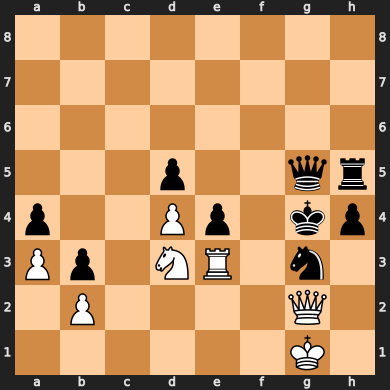

In [11]:
import chess
board = chess.Board()
board.clear_board()
board.set_piece_map({
  chess.A4: chess.Piece(chess.PAWN, chess.BLACK),
  chess.B3: chess.Piece(chess.PAWN, chess.BLACK),
  chess.A3: chess.Piece(chess.PAWN, chess.WHITE),
  chess.B2: chess.Piece(chess.PAWN, chess.WHITE),

  chess.D5: chess.Piece(chess.PAWN, chess.BLACK),
  chess.E4: chess.Piece(chess.PAWN, chess.BLACK),
  chess.D4: chess.Piece(chess.PAWN, chess.WHITE),
  chess.D3: chess.Piece(chess.KNIGHT, chess.WHITE),
  chess.E3: chess.Piece(chess.ROOK, chess.WHITE),

  chess.G5: chess.Piece(chess.QUEEN, chess.BLACK),
  chess.H5: chess.Piece(chess.ROOK, chess.BLACK),
  chess.G4: chess.Piece(chess.KING, chess.BLACK),
  chess.H4: chess.Piece(chess.PAWN, chess.BLACK),
  chess.G3: chess.Piece(chess.KNIGHT, chess.BLACK),
  chess.G2: chess.Piece(chess.QUEEN, chess.WHITE),
  chess.G1: chess.Piece(chess.KING, chess.WHITE),
})
print('Phase: ', cal_phase(board))
board

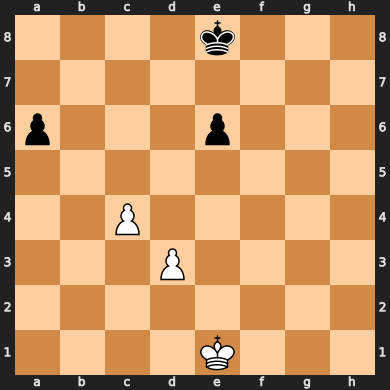

In [18]:
import chess
board = chess.Board()
board.clear_board()
board.set_piece_map({
  chess.C4: chess.Piece(chess.PAWN, chess.WHITE),
  chess.D3: chess.Piece(chess.PAWN, chess.WHITE),
  chess.A6: chess.Piece(chess.PAWN, chess.BLACK),
  chess.E6: chess.Piece(chess.PAWN, chess.BLACK),
  chess.E1: chess.Piece(chess.KING, chess.WHITE),
  chess.E8: chess.Piece(chess.KING, chess.BLACK),
})
board

total time:  0.00011491775512695312


3.655938329757191e-05